In [166]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import folium

pd.options.mode.chained_assignment = None

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Project 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.driver.memory", "4g")
    .config("spark.executor.memory", "8g")
    .getOrCreate()
)

In [121]:
yellow_19_20_sdf = spark.read.parquet('../data/curated/yellow_19-20_curated/', header=True)
yellow_21_22_sdf = spark.read.parquet('../data/curated/yellow_21-22_curated/', header=True)
fhvhv_19_20_sdf = spark.read.parquet('../data/curated/fhvhv_19-20_curated/', header=True)
fhvhv_21_22_sdf = spark.read.parquet('../data/curated/fhvhv_21-22_curated/', header=True)
covid_sdf = spark.read.parquet('../data/curated/nyc_covid_2021-2022_clean.parquet', header=True)

<h2><u>Feature Distributions</u></h2>

<h3>Total Amount Distribution</h3>

**Yellow Taxis**

In [32]:
total_amount_yellow_19_20_df = yellow_19_20_sdf.select('total_amount').sample(fraction=0.05, seed=42).toPandas()
total_amount_yellow_21_22_df = yellow_21_22_sdf.select('total_amount').sample(fraction=0.05, seed=42).toPandas()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


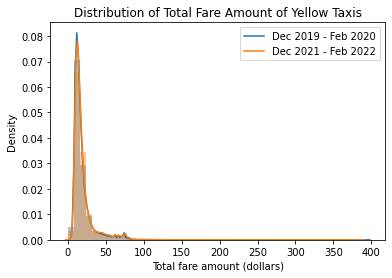

In [33]:
sns.distplot(total_amount_yellow_19_20_df['total_amount'])
sns.distplot(total_amount_yellow_21_22_df['total_amount'])
plt.title('Distribution of Total Fare Amount of Yellow Taxis')
plt.xlabel('Total fare amount (dollars)')
plt.ylabel('Density')
plt.legend(labels=['Dec 2019 - Feb 2020', 'Dec 2021 - Feb 2022'])
plt.show()

**FHVHV**

In [21]:
total_amount_fhvhv_19_20_df = fhvhv_19_20_sdf.select('total_amount').sample(fraction=0.05, seed=42).toPandas()
total_amount_fhvhv_21_22_df = fhvhv_21_22_sdf.select('total_amount').sample(fraction=0.05, seed=42).toPandas()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


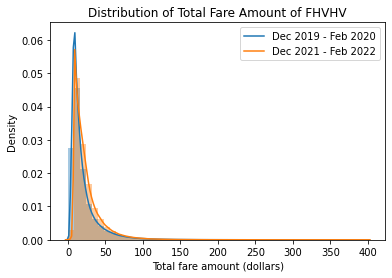

In [22]:
sns.distplot(total_amount_fhvhv_19_20_df['total_amount'])
sns.distplot(total_amount_fhvhv_21_22_df['total_amount'])
plt.title('Distribution of Total Fare Amount of FHVHV')
plt.xlabel('Total fare amount (dollars)')
plt.ylabel('Density')
plt.legend(labels=['Dec 2019 - Feb 2020', 'Dec 2021 - Feb 2022'])
plt.show()

<h3>Tip Percent Distribution</h3>

**Yellow Taxis**

In [30]:
tip_percent_yellow_19_20_df = yellow_19_20_sdf.where(F.col('payment_type') == 1).select('tip_percent').sample(fraction=0.05, seed=42).toPandas()
tip_percent_yellow_21_22_df = yellow_21_22_sdf.where(F.col('payment_type') == 1).select('tip_percent').sample(fraction=0.05, seed=42).toPandas()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


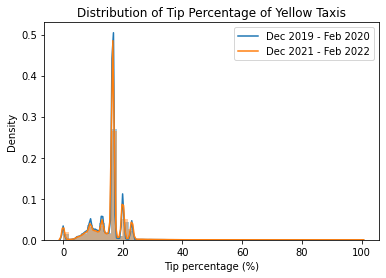

In [31]:
sns.distplot(tip_percent_yellow_19_20_df['tip_percent'])
sns.distplot(tip_percent_yellow_21_22_df['tip_percent'])
plt.title('Distribution of Tip Percentage of Yellow Taxis')
plt.xlabel('Tip percentage (%)')
plt.ylabel('Density')
plt.legend(labels=['Dec 2019 - Feb 2020', 'Dec 2021 - Feb 2022'])
plt.show()

**FHVHV**

In [160]:
tip_percent_fhvhv_19_20_df = fhvhv_19_20_sdf.select('tip_percent').sample(fraction=0.05, seed=42).toPandas()
tip_percent_fhvhv_21_22_df = fhvhv_21_22_sdf.select('tip_percent').sample(fraction=0.05, seed=42).toPandas()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


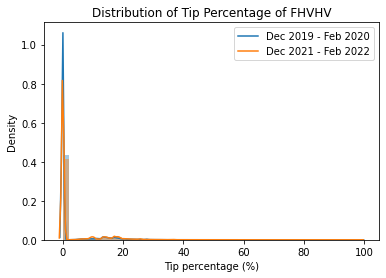

In [32]:
sns.distplot(tip_percent_fhvhv_19_20_df['tip_percent'])
sns.distplot(tip_percent_fhvhv_21_22_df['tip_percent'])
plt.title('Distribution of Tip Percentage of FHVHV')
plt.xlabel('Tip percentage (%)')
plt.ylabel('Density')
plt.legend(labels=['Dec 2019 - Feb 2020', 'Dec 2021 - Feb 2022'])
plt.show()

<h2><u>Timelines</u></h2>

<h3>Trip Counts</h3>

In [145]:
yellow_19_20_df = yellow_19_20_sdf.groupBy(F.to_date("pickup_datetime").alias("pickup_date")).count().toPandas()
fhvhv_19_20_df = fhvhv_19_20_sdf.groupBy(F.to_date("pickup_datetime").alias("pickup_date")).count().toPandas()

yellow_21_22_df = yellow_21_22_sdf.groupBy(F.to_date("pickup_datetime").alias("pickup_date")).count().toPandas()
fhvhv_21_22_df = fhvhv_21_22_sdf.groupBy(F.to_date("pickup_datetime").alias("pickup_date")).count().toPandas()

covid_df = covid_sdf.toPandas()

**2019-2020 Yellow Taxi vs FHVHV**

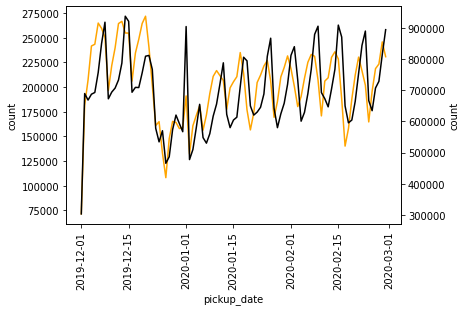

In [155]:
ax = sns.lineplot(data=yellow_19_20_df, x="pickup_date", y="count", color="orange")
ax2 = ax.twinx()
sns.lineplot(data=fhvhv_19_20_df, x="pickup_date", ax=ax2, y="count", color="black")

ax.tick_params(axis='x', rotation=90)
plt.show()

**2021-2022 Yellow Taxi vs FHVHV**

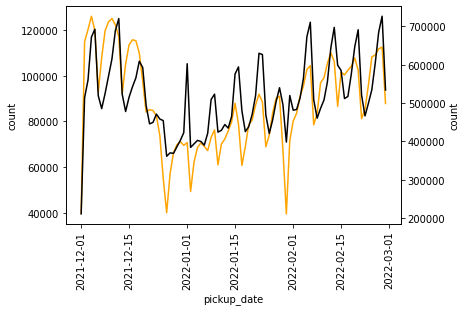

In [159]:
ax = sns.lineplot(data=yellow_21_22_df, x="pickup_date", y="count", color="orange")
ax2 = ax.twinx()
sns.lineplot(data=fhvhv_21_22_df, x="pickup_date", ax=ax2, y="count", color="black")

ax.tick_params(axis='x', rotation=90)
plt.show()

**2021-2022 Yellow Taxi Trip Count vs COVID-19 Case Count**

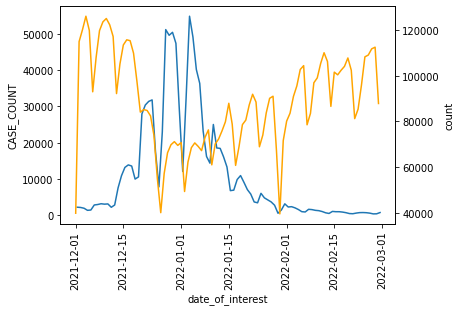

In [161]:
covid_df = covid_sdf.toPandas()

ax = sns.lineplot(data=covid_df, x="date_of_interest", y="CASE_COUNT")
ax2 = ax.twinx()
sns.lineplot(data=yellow_21_22_df, x="pickup_date", ax=ax2, y="count", color="orange")

ax.tick_params(axis='x', rotation=90)
plt.show()

**2021-2022 FHVHV Trip Count vs COVID-19 Case Count**

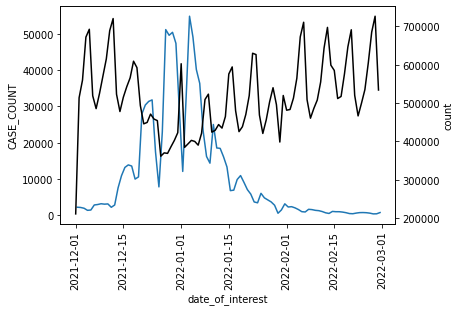

In [144]:
ax = sns.lineplot(data=covid_df, x="date_of_interest", y="CASE_COUNT")
ax2 = ax.twinx()
sns.lineplot(data=fhvhv_21_22_df, x="pickup_date", ax=ax2, y="count", color="black")

ax.tick_params(axis='x', rotation=90)
plt.show()

<h2><u>Geospatial Analysis</u></h2>

In [164]:
sf = gpd.read_file("../data/curated/Taxi Zones/taxi_zones.shp")
zones = pd.read_csv("../data/curated/Taxi Zones/taxi_zones_lookup.csv")

# Convert the geometry shape to to latitude and longitude
# Please attribute this if you are using it
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

gdf = gpd.GeoDataFrame(
    pd.merge(zones, sf, on='LocationID', how='inner')
)

geoJSON = gdf[['LocationID', 'geometry']].drop_duplicates('LocationID').to_json()

<h3>Trip Counts</h3>

In [ ]:
def plot_counts(df, gdf, geoJSON):
    geo_df = df \
        .merge(gdf[['LocationID', 'geometry']], left_on='PULocationID', right_on='LocationID') \
        .drop('LocationID', axis=1)

    # find count of each zone
    proportions = geo_df[['PULocationID']] \
                    .groupby('PULocationID') \
                    .agg({'PULocationID': 'count'}) \
                    .rename({'PULocationID': 'total_trips'}, axis=1) \
                    .reset_index()

    geo_map = folium.Map(location=[40.73, -73.74], tiles="Stamen Terrain", zoom_start=10)

    # refer to the folium documentations on more information on how to plot aggregated data.
    c = folium.Choropleth(
        geo_data=geoJSON, # geoJSON 
        name='choropleth', # name of plot
        data=proportions, # data source
        columns=['PULocationID', 'total_trips'], # the columns required
        key_on='properties.LocationID', # this is from the geoJSON's properties
        fill_color='YlOrRd', # color scheme
        nan_fill_color='black',
        legend_name='Total Trips Beginning per Location'
    )

    c.add_to(geo_map)

    # add airport markers
    gdf.loc[gdf['Zone'].str.contains('Airport')]
    gdf['centroid'] = gdf['geometry'].apply(lambda x: (x.centroid.y, x.centroid.x))

    for zone_name, coord in gdf.loc[gdf['Zone'].str.contains('Airport'), ['Zone', 'centroid']].values:
        geo_map.add_child(
            folium.Marker(location=coord, popup=zone_name)
        )
    
    return geo_map|

**2019-2020 Yellow Taxi**

In [225]:
count_yellow_19_20_df = yellow_19_20_sdf.select('PULocationID', 'DOLocationID').sample(fraction=0.05, seed=42).toPandas()
count_yellow_19_20_map = plot_counts(count_yellow_19_20_df, gdf, geoJSON)

In [226]:
count_yellow_21_22_df = yellow_21_22_sdf.select('PULocationID', 'DOLocationID').sample(fraction=0.05, seed=42).toPandas()
count_yellow_21_22_map = plot_counts(count_yellow_21_22_df, gdf, geoJSON)

**2021-2022 Yellow Taxi**